In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import string
from nltk.corpus import stopwords

In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nalla_oqdrvr6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nalla_oqdrvr6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#dataset
data = pd.read_excel(r'C:\Users\nalla_oqdrvr6\Downloads\hotel_reviews.xlsx')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [9]:
#checking for missing values
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [11]:
#assigning sentiments based on rating
def assign_sentiments(Rating):
    return 'Positive' if Rating >= 4 else 'Negative'

data['Sentiment'] = data['Rating'].apply(assign_sentiments)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     20491 non-null  object
 1   Rating     20491 non-null  int64 
 2   Sentiment  20491 non-null  object
dtypes: int64(1), object(2)
memory usage: 480.4+ KB


In [27]:
#preprocessing the reviews
def preprocess_review(Review):
    tokens = word_tokenize(Review)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

data['tokenised_reviews'] = data['Review'].apply(preprocess_review)

In [16]:
print(data)

                                                  Review  Rating Sentiment  \
0      nice hotel expensive parking got good deal sta...       4  Positive   
1      ok nothing special charge diamond member hilto...       2  Negative   
2      nice rooms not 4* experience hotel monaco seat...       3  Negative   
3      unique, great stay, wonderful time hotel monac...       5  Positive   
4      great stay great stay, went seahawk game aweso...       5  Positive   
...                                                  ...     ...       ...   
20486  best kept secret 3rd time staying charm, not 5...       5  Positive   
20487  great location price view hotel great quick pl...       4  Positive   
20488  ok just looks nice modern outside, desk staff ...       2  Negative   
20489  hotel theft ruined vacation hotel opened sept ...       1  Negative   
20490  people talking, ca n't believe excellent ratin...       2  Negative   

                                       tokenised_reviews  
0   

In [31]:
data['tokenised_reviews'] = data['tokenised_reviews'].tolist()
data['tokenised_reviews']

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, experience, hotel, monaco, seatt...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, time, staying, charm, ca,...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, believe, excellent, rati...
Name: tokenised_reviews, Length: 20491, dtype: object

In [35]:
#training the model

from gensim.models import Word2Vec

model = Word2Vec(data['tokenised_reviews'], vector_size=100, window=5, min_count=2, workers=4, sg=1)
model

In [43]:
#additional training
model.train(data['tokenised_reviews'],total_examples=len(data['tokenised_reviews']),epochs=10)

(17366026, 19247730)

In [45]:
similar_words = model.wv.most_similar('hotel')
similar_words

[('monopol', 0.810026228427887),
 ('mazarin', 0.7832149267196655),
 ('fantastc', 0.779674768447876),
 ('berchielli', 0.7785251140594482),
 ('convienently', 0.7758277654647827),
 ('locaton', 0.774262547492981),
 ('athenaeum', 0.7685045599937439),
 ('majors', 0.7662182450294495),
 ('acte', 0.7651770114898682),
 ('mitre', 0.7634630799293518)]

In [47]:
Word_vectors = model.wv['room']
Word_vectors

array([-0.2079745 ,  0.21784069,  0.1511726 ,  0.36356685, -0.00409884,
       -0.5397322 ,  0.13360022,  0.16276017, -0.0355767 , -0.27929786,
       -0.01228051, -0.04850751,  0.19012833, -0.04460818,  0.04411665,
       -0.31140926,  0.19900522, -0.1355789 , -0.02936627, -0.4303162 ,
        0.04560087,  0.17206685,  0.41304728, -0.64137775,  0.30470383,
       -0.04531256, -0.30517128,  0.07064064, -0.22394407, -0.1875106 ,
        0.33651504,  0.05519283,  0.03439249, -0.15001301,  0.12721106,
       -0.01659082, -0.11130727,  0.17056824,  0.33722043,  0.01248676,
       -0.11903853, -0.1669632 , -0.3733401 , -0.22899406, -0.20319949,
        0.25114468, -0.2085447 , -0.1610246 ,  0.17402247, -0.20179886,
        0.10308645, -0.21946932, -0.11824213, -0.0364255 ,  0.06026887,
        0.27221248,  0.38469386,  0.11958201, -0.02290719, -0.18037975,
       -0.2856862 ,  0.01650521,  0.00548437, -0.11930987, -0.29287192,
        0.26508632, -0.06488147,  0.05842847, -0.18369845,  0.02

In [49]:
result = model.wv.most_similar(positive=['room','clean'],negative=['dirty'])
result

[('rooms', 0.7308468222618103),
 ('spacious', 0.7002395391464233),
 ('rooom', 0.6635240912437439),
 ('impecibly', 0.6577648520469666),
 ('appointed', 0.6544995307922363),
 ('spotlessly', 0.6533846855163574),
 ('stylishly', 0.6356275081634521),
 ('cosily', 0.6337946653366089),
 ('spacey', 0.6281524896621704),
 ('cherrywood', 0.6281437277793884)]

In [51]:
# Function to get the average Word2Vec vector for a sentence
def get_avg_word2vec(tokens, model, vector_size):
    # Filter out words that are not in the Word2Vec vocabulary
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)  # Return a zero vector if no word is in the vocabulary
    else:
        return np.mean(vectors, axis=0)

In [53]:
#convert each review to a vector
data['vectorized_reviews'] = data['tokenised_reviews'].apply(lambda tokens: get_avg_word2vec(tokens, model, 100))

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume `labels` is the target variable for each review
x = np.array(data['vectorized_reviews'].tolist())
y = data['Rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train all three models
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

In [56]:
data.head()

,Review,Rating,Sentiment,tokenised_reviews,tokenized_reviews,vectorized_reviews
0,nice hotel expensive parking got good deal sta...,4,Positive,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[-0.3357823, 0.07207583, -0.14168282, 0.048325..."
1,ok nothing special charge diamond member hilto...,2,Negative,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[-0.34333777, -0.015320155, -0.08091111, 0.093..."
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,"[nice, rooms, experience, hotel, monaco, seatt...","[nice, rooms, experience, hotel, monaco, seatt...","[-0.29065084, 0.07731358, -0.14528197, 0.02621..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[-0.23622258, -0.008219728, -0.13663921, 0.029..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[-0.37186733, 0.032668386, -0.11321956, 0.0837..."


In [59]:
#Evaluate the models

# Logistic Regression Evaluation
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(classification_report(y_test, y_pred_lr))

# Random Forest Evaluation
print("\nRandom Forest:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(classification_report(y_test, y_pred_rf))

# Decision Tree Evaluation
print("\nDecision Tree:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')
print(classification_report(y_test, y_pred_dt))

Logistic Regression:
Accuracy: 0.6267
              precision    recall  f1-score   support

           1       0.70      0.62      0.66       292
           2       0.45      0.49      0.47       333
           3       0.49      0.22      0.31       432
           4       0.54      0.50      0.52      1252
           5       0.71      0.84      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.58      0.53      0.54      4099
weighted avg       0.61      0.63      0.61      4099


Random Forest:
Accuracy: 0.5804
              precision    recall  f1-score   support

           1       0.69      0.54      0.61       292
           2       0.41      0.35      0.38       333
           3       0.41      0.07      0.13       432
           4       0.47      0.41      0.44      1252
           5       0.64      0.87      0.74      1790

    accuracy                           0.58      4099
   macro avg       0.52      0.45      0.46      4099
weight

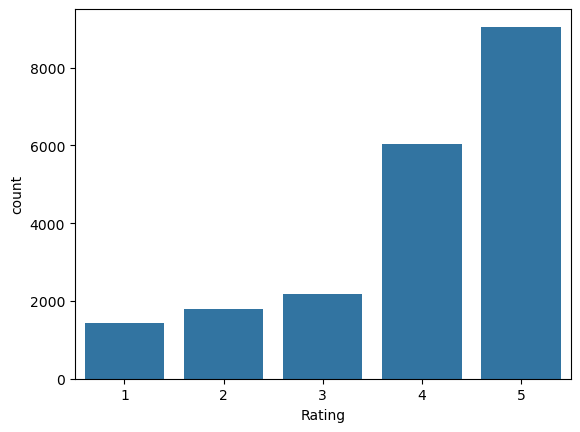

In [61]:
#Visualisation

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating',data=data)
plt.show()

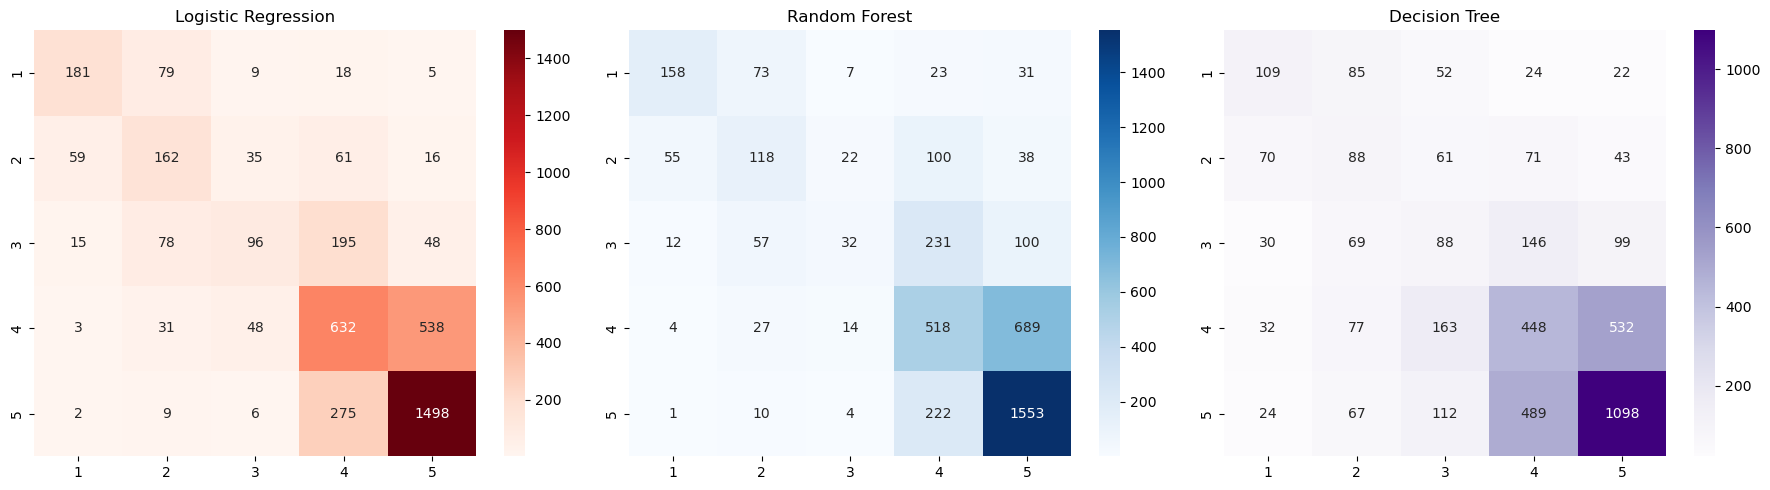

In [63]:
from sklearn.metrics import confusion_matrix

#confusion matrix

cm_lr= confusion_matrix(y_test,y_pred_lr)
cm_rf= confusion_matrix(y_test,y_pred_rf)
cm_dt= confusion_matrix(y_test,y_pred_dt)

fig,axes=plt.subplots(1,3,figsize=(18,5))

sns.heatmap(cm_lr,annot = True,fmt='d',cmap='Reds',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'],ax=axes[0])
axes[0].set_title('Logistic Regression')
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'],ax=axes[1])
axes[1].set_title("Random Forest")
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Purples',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'],ax=axes[2])
axes[2].set_title("Decision Tree")
plt.tight_layout()
plt.show()

#Report

Logistic Regression gives the high accuracy compared to other model
Logistic Regression is the best model